[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Strategy       4.324803
Return_perc    0.995901
dtype: float64

Strategy       0.023593
Return_perc    0.024405
dtype: float64

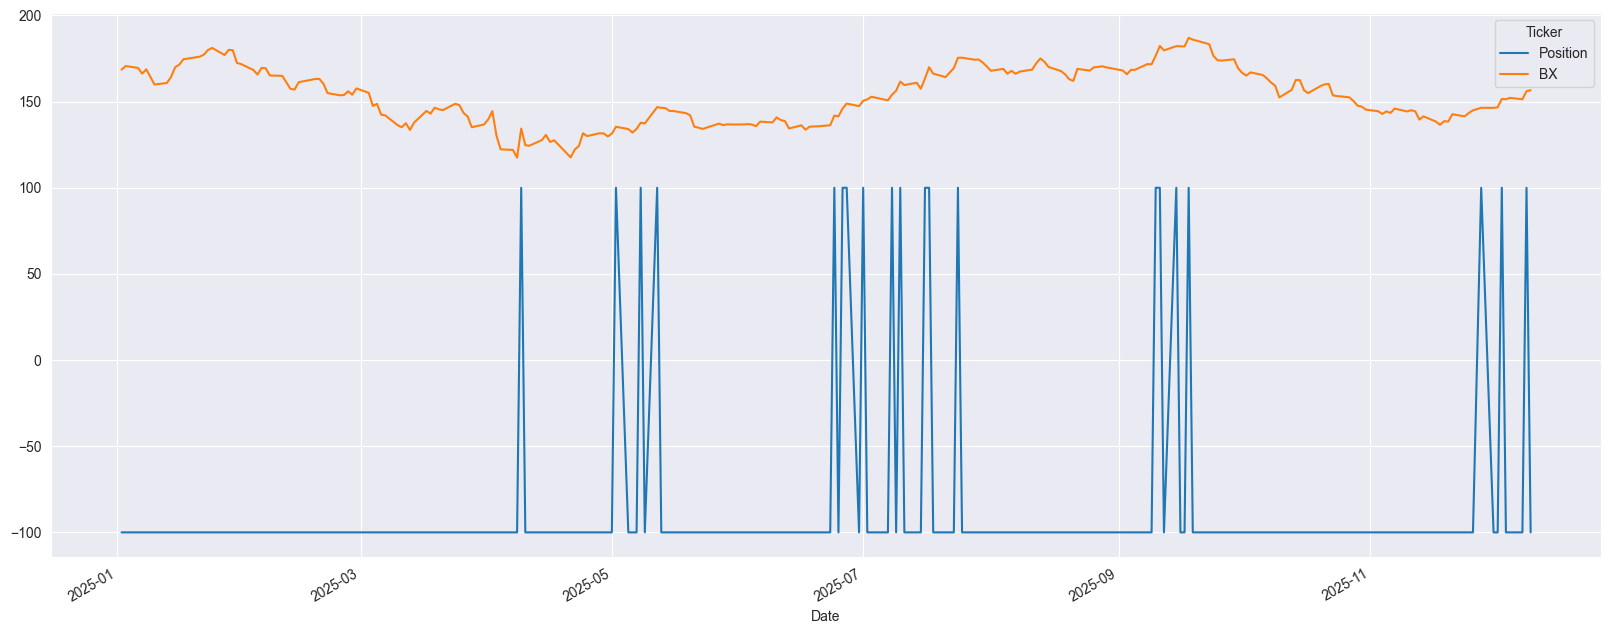

In [222]:
from xmlrpc.client import APPLICATION_ERROR

from IPython.core.display import display_png
from pandas import read_parquet
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import yfinance as yf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests


def mean_reversion(stock,start,end):
    df=yf.download(stock,interval='1h',start=start,end=end)['Close']

    df_2=yf.download(stock,interval='1d',start=start,end=end)['Close']
    df_2
    df_3=yf.download(stock,interval='1d',start=start,end=end)['Close']
    df_3

    df[stock]['2025-01-02'].to_frame()

    ATR=[0]*6
    df_2['Daily_Max']=0
    df_2['Daily_Diff']=0
    #df_2['Daily_diff']=max(df['AAPL'][df_2['Daily_diff'].index()])-min(df['AAPL'][df_2['Daily_diff'].index()])
    for n in df_2.index:
        n = n.strftime("%Y-%m-%d")
        df_2['Daily_Diff'][n]=max(df[stock][n])-min(df[stock][n])
    df_2['ATR']=df_2['Daily_Diff'].rolling(5).mean()
    for n in df_2.index:
        n = n.strftime("%Y-%m-%d")
        df_2['Daily_Max'].loc[n]=max(df[stock].loc[n])
    df_2['5_day_max']=df_2['Daily_Max'].rolling(20).max()
    df_2['Entry_Band']=df_2['5_day_max']-(2.5*df_2['ATR'])

    df_2['Enter_Position']=np.where(df_2['Entry_Band'] > (df_2[stock]), 0, 100)
    df_2['Exit_Position']=np.where(df_2[stock]>df_2['Daily_Max'].shift(1),100,0)
    df_2

    df_2.iloc[1,0]
    df_2['Position']=0
    df_2

    i=0
    trigger=0
    while i<=235:
        if df_2.iloc[i,6]==100:
            trigger=1
        if trigger==1:
            if df_2.iloc[i,7]==100:
                df_2.iloc[i,8]=100
            else:
                trigger=0
                df_2.iloc[i,8]=-100
        else:
            df_2.iloc[i,8]=-100
        i=i+1
    df_2.tail(50)

    df_2[['Position',stock]].plot(figsize=(20,8))
    #df[stock].plot(ax=ax)

    rst=pd.DataFrame()
    rst['Close']=df_2[stock]
    rst['Position']=df_2['Position']
    rst['Return_perc']=rst['Close']/rst['Close'].shift(1)-1
    rst['Strategy']=rst['Return_perc']*rst['Position']/100

    rst.dropna()
    display(rst[['Strategy','Return_perc']].sum().apply(np.exp))
    display(rst[['Strategy','Return_perc']].std())

mean_reversion('BX','2025-01-01','2025-12-11')

In [210]:
df_2=yf.download('AAPL',interval='1d',start='2025-01-01',end='2025-12-11')['Close']
df_2
df_3=yf.download('AAPL',interval='1d',start='2025-01-01',end='2025-12-11')['Close']
df_3

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2025-01-02,242.752090
2025-01-03,242.264297
2025-01-06,243.896912
2025-01-07,241.119492
2025-01-08,241.607285
...,...
2025-12-04,280.700012
2025-12-05,278.779999
2025-12-08,277.890015


In [211]:
df['AAPL']['2025-01-02'].to_frame()

,AAPL
Datetime,
2025-01-02 14:30:00+00:00,245.739899
2025-01-02 15:30:00+00:00,244.895004
2025-01-02 16:30:00+00:00,243.428604
2025-01-02 17:30:00+00:00,242.686203
2025-01-02 18:30:00+00:00,242.488403
2025-01-02 19:30:00+00:00,243.231094
2025-01-02 20:30:00+00:00,243.820007


## calculating ATR

In [212]:
ATR=[0]*6
df_2['Daily_Max']=0
df_2['Daily_Diff']=0
#df_2['Daily_diff']=max(df['AAPL'][df_2['Daily_diff'].index()])-min(df['AAPL'][df_2['Daily_diff'].index()])
for n in df_2.index:
    n = n.strftime("%Y-%m-%d")
    df_2['Daily_Diff'][n]=max(df['AAPL'][n])-min(df['AAPL'][n])
df_2['ATR']=df_2['Daily_Diff'].rolling(5).mean()
for n in df_2.index:
    n = n.strftime("%Y-%m-%d")
    df_2['Daily_Max'].loc[n]=max(df['AAPL'].loc[n])
df_2['5_day_max']=df_2['Daily_Max'].rolling(20).max()
df_2['Entry_Band']=df_2['5_day_max']-(2.5*df_2['ATR'])

df_2['Enter_Position']=np.where(df_2['Entry_Band'] > (df_2['AAPL']), 0, 100)
df_2['Exit_Position']=np.where(df_2['AAPL']>df_2['Daily_Max'].shift(1),100,0)
df_2

Ticker,AAPL,Daily_Max,Daily_Diff,ATR,5_day_max,Entry_Band,Enter_Position,Exit_Position
Date,,,,,,,,
2025-01-02,242.752090,245.739899,3.251495,NaN,NaN,NaN,100,0
2025-01-03,242.264297,243.490005,1.030212,NaN,NaN,NaN,100,0
2025-01-06,243.896912,246.740005,1.845001,NaN,NaN,NaN,100,100
2025-01-07,241.119492,245.388901,3.378906,NaN,NaN,NaN,100,0
2025-01-08,241.607285,242.794998,1.425003,2.186124,NaN,NaN,100,0
...,...,...,...,...,...,...,...,...
2025-12-04,280.700012,281.225006,2.365021,2.685101,287.340515,280.627762,100,0
2025-12-05,278.779999,280.455109,2.140106,2.953125,287.340515,279.957703,0,0
2025-12-08,277.890015,277.959991,1.600006,2.193127,287.340515,281.857697,0,0


In [213]:
df_2.iloc[1,0]
df_2['Position']=0
df_2

Ticker,AAPL,Daily_Max,Daily_Diff,ATR,5_day_max,Entry_Band,Enter_Position,Exit_Position,Position
Date,,,,,,,,,
2025-01-02,242.752090,245.739899,3.251495,NaN,NaN,NaN,100,0,0
2025-01-03,242.264297,243.490005,1.030212,NaN,NaN,NaN,100,0,0
2025-01-06,243.896912,246.740005,1.845001,NaN,NaN,NaN,100,100,0
2025-01-07,241.119492,245.388901,3.378906,NaN,NaN,NaN,100,0,0
2025-01-08,241.607285,242.794998,1.425003,2.186124,NaN,NaN,100,0,0
...,...,...,...,...,...,...,...,...,...
2025-12-04,280.700012,281.225006,2.365021,2.685101,287.340515,280.627762,100,0,0
2025-12-05,278.779999,280.455109,2.140106,2.953125,287.340515,279.957703,0,0,0
2025-12-08,277.890015,277.959991,1.600006,2.193127,287.340515,281.857697,0,0,0


In [214]:
i=0
trigger=0
while i<=235:
    if df_2.iloc[i,6]==100:
        trigger=1
    if trigger==1:
        if df_2.iloc[i,7]==100:
            df_2.iloc[i,8]=100
        else:
            trigger=0
            df_2.iloc[i,8]=-100
    else:
        df_2.iloc[i,8]=-100
    i=i+1
df_2.tail(50)

Ticker,AAPL,Daily_Max,Daily_Diff,ATR,5_day_max,Entry_Band,Enter_Position,Exit_Position,Position
Date,,,,,,,,,
2025-10-01,255.202606,256.484985,1.074982,1.951175,256.959991,252.082054,100,100,100
2025-10-02,256.880981,257.880005,1.659912,1.397220,257.880005,254.386955,100,100,100
2025-10-03,257.770111,258.548706,0.698700,1.229962,258.548706,255.473801,100,0,-100
2025-10-06,256.441406,257.779999,1.595001,1.314960,258.548706,255.261307,100,0,-100
2025-10-07,256.231628,256.679993,0.789993,1.163718,258.548706,255.639412,100,0,-100
2025-10-08,257.810089,258.250000,0.410004,1.030722,258.548706,255.971901,100,100,100
2025-10-09,253.793961,254.919998,1.520004,1.002740,258.548706,256.041855,0,0,-100
2025-10-10,245.032471,255.020599,9.740601,2.811121,258.548706,251.520905,0,0,-100
2025-10-13,247.420151,249.179993,2.803986,3.052917,258.548706,250.916412,0,0,-100


In [215]:
df_2.columns


Index(['AAPL', 'Daily_Max', 'Daily_Diff', 'ATR', '5_day_max', 'Entry_Band',
       'Enter_Position', 'Exit_Position', 'Position'],
      dtype='object', name='Ticker')

<Axes: xlabel='Date'>

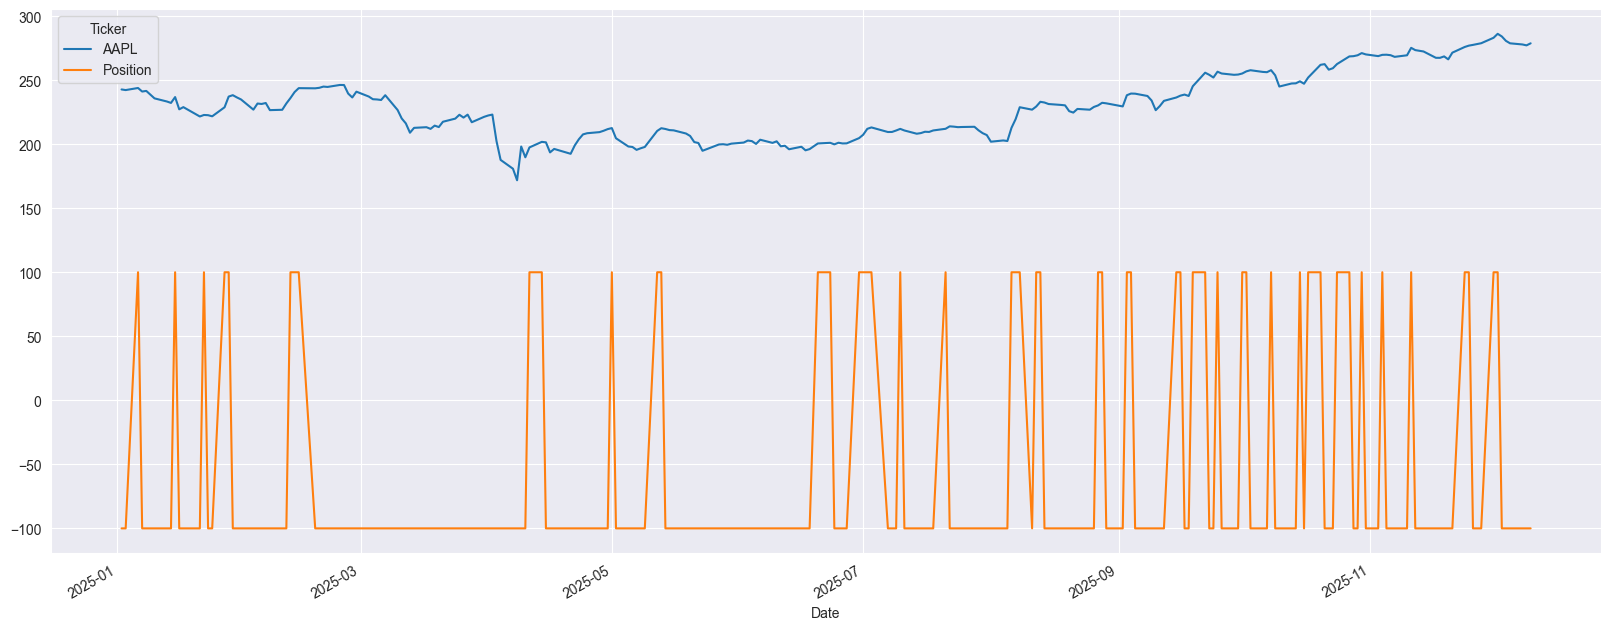

In [216]:
df_2[['AAPL','Position']].plot(figsize=(20,8))

## Results Calculation

In [217]:
rst=pd.DataFrame()
rst['Close']=df_2['AAPL']
rst['Position']=df_2['Position']
rst['Return_perc']=rst['Close']/rst['Close'].shift(1)-1
rst['Strategy']=rst['Return_perc']*rst['Position']/100
display(rst[['Strategy','Return_perc']].sum().apply(np.exp))
rst.head(60)

Strategy       5.036867
Return_perc    1.208435
dtype: float64

,Close,Position,Return_perc,Strategy
Date,,,,
2025-01-02,242.752090,-100,NaN,NaN
2025-01-03,242.264297,-100,-0.002009,0.002009
2025-01-06,243.896912,100,0.006739,0.006739
2025-01-07,241.119492,-100,-0.011388,0.011388
2025-01-08,241.607285,-100,0.002023,-0.002023
2025-01-10,235.783615,-100,-0.024104,0.024104
2025-01-13,233.344635,-100,-0.010344,0.010344
2025-01-14,232.229691,-100,-0.004778,0.004778
2025-01-15,236.799011,100,0.019676,0.019676


In [218]:
rst.dropna()
display(rst[['Strategy','Return_perc']].sum().apply(np.exp))
display(rst[['Strategy','Return_perc']].std())

Strategy       5.036867
Return_perc    1.208435
dtype: float64

Strategy       0.019845
Return_perc    0.020993
dtype: float64

## For Emergency

In [219]:
# for emergency
from xmlrpc.client import APPLICATION_ERROR

from IPython.core.display import display_png
from pandas import read_parquet
from statsmodels.regression.rolling import RollingOLS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import yfinance as yf
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import requests
df=yf.download('AAPL',interval='1h',start='2025-01-01',end='2025-12-11')['Close']

    df_2=yf.download('AAPL',interval='1d',start='2025-01-01',end='2025-12-11')['Close']
    df_2
    df_3=yf.download('AAPL',interval='1d',start='2025-01-01',end='2025-12-11')['Close']
    df_3

    df['AAPL']['2025-01-02'].to_frame()

    ATR=[0]*6
    df_2['Daily_Max']=0
    df_2['Daily_Diff']=0
    #df_2['Daily_diff']=max(df['AAPL'][df_2['Daily_diff'].index()])-min(df['AAPL'][df_2['Daily_diff'].index()])
    for n in df_2.index:
        n = n.strftime("%Y-%m-%d")
        df_2['Daily_Diff'][n]=max(df['AAPL'][n])-min(df['AAPL'][n])
    df_2['ATR']=df_2['Daily_Diff'].rolling(5).mean()
    for n in df_2.index:
        n = n.strftime("%Y-%m-%d")
        df_2['Daily_Max'].loc[n]=max(df['AAPL'].loc[n])
    df_2['5_day_max']=df_2['Daily_Max'].rolling(20).max()
    df_2['Entry_Band']=df_2['5_day_max']-(2.5*df_2['ATR'])

    df_2['Enter_Position']=np.where(df_2['Entry_Band'] > (df_2['AAPL']), 0, 100)
    df_2['Exit_Position']=np.where(df_2['AAPL']>df_2['Daily_Max'].shift(1),100,0)
    df_2

    df_2.iloc[1,0]
    df_2['Position']=0
    df_2

    i=0
    trigger=0
    while i<=235:
        if df_2.iloc[i,6]==100:
            trigger=1
        if trigger==1:
            if df_2.iloc[i,7]==100:
                df_2.iloc[i,8]=100
            else:
                trigger=0
                df_2.iloc[i,8]=-100
        else:
            df_2.iloc[i,8]=-100
        i=i+1
    df_2.tail(50)

    df_2[['AAPL','Position']].plot(figsize=(20,8))

    rst=pd.DataFrame()
    rst['Close']=df_2[stock]
    rst['Position']=df_2['Position']
    rst['Return_perc']=rst['Close']/rst['Close'].shift(1)-1
    rst['Strategy']=rst['Return_perc']*rst['Position']/100

    rst.dropna()
    display(rst[['Strategy','Return_perc']].sum().apply(np.exp))
    display(rst[['Strategy','Return_perc']].std())

IndentationError: unexpected indent (287752186.py, line 22)